# Project : INSTA BOT 2
## by: Gaurav Makhijani

## Loging in to Instagram Handle

In [4]:
from selenium import webdriver
import time
import re
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup as bs
driver=webdriver.Chrome(executable_path="../web_driver/chromedriver.exe")
driver.get('https://www.instagram.com/')

wait = WebDriverWait(driver, 10)
wait.until(EC.presence_of_element_located((By.NAME, "username")))  ## getting the input feilds
wait.until(EC.presence_of_element_located((By.NAME, "password")))
u = driver.find_element_by_name('username')
u.send_keys('<Enter Username>')
p = driver.find_element_by_name('password')
p.send_keys('<Enter Password>')
p.submit()



## 1.1 From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

In [5]:
d = {}
index = 0
count = 1
while True:
    if(count>10):
        break
    wait = WebDriverWait(driver, 10)
    wait.until(EC.presence_of_element_located((By.XPATH, '//input[@class = "XTCLo  x3qfX "]')))
    search = driver.find_element_by_xpath('//input[@class = "XTCLo  x3qfX "]')
    search.clear()
    search.send_keys('food') ## searching food
    wait = WebDriverWait(driver, 10)
    wait.until(EC.presence_of_element_located((By.XPATH, '//a[@class = "-qQT3"]')))
    result = driver.find_elements_by_xpath('//a[@class = "-qQT3"]')
    i = result[index]
    # condition to check that we dont use locations and tags
    if '/explore/locations/' in i.get_attribute('href') or '/explore/tags/' in i.get_attribute('href'):
        index+=1
        continue
    else:
        i.click()
        wait = WebDriverWait(driver, 10)
        wait.until(EC.presence_of_element_located((By.CLASS_NAME, 'g47SY ')))
        li = driver.find_elements_by_class_name('g47SY ')
        number_string = li[1].text # getting the no. of followers 
        if number_string[-1] == 'k':   ## converting from K to 1000 
            final_number = int(float(number_string[:-1].replace(',','')) * 1000)
        elif number_string[-1] == 'm':   ## converting from m to 1000000
            final_number = int(float(number_string[:-1].replace(',','')) * 1000000)
        else:
            final_number = int(float(number_string.replace(',','')))
        d[driver.find_element_by_tag_name('h2').text] = final_number  ## pushing into dict
        driver.back()
        count+=1
        index+=1
## printing in sorted order
from collections import Counter
  
# Initial Dictionary
  
k = Counter(d)
  
# Finding 3 highest values
high = k.most_common(5)

print("5 Insta Handles with highest followers are:")
for i in high:
    print(i[0]," :",i[1]," followers")


5 Insta Handles with highest followers are:
yourfoodlab  : 1600000  followers
food  : 120000  followers
sailusfood  : 69700  followers
food_blog_bhopal  : 20100  followers
bhopalfoodwalks  : 11400  followers


## 1.2 Now Find the number of posts these handles have done in the previous 3 days.

In [6]:
import time
handles = []
followers = []
post_count_3_days = []
# going to every  top 5 handle 
for i in high:
    time.sleep(5)
    handles.append(i[0])
    followers.append(i[1])
    wait = WebDriverWait(driver, 10)
    wait.until(EC.presence_of_element_located((By.XPATH, '//input[@class = "XTCLo  x3qfX "]')))
    search = driver.find_element_by_xpath('//input[@class = "XTCLo  x3qfX "]')
    search.clear()
    search.send_keys(i[0]) ## searching food
    wait = WebDriverWait(driver, 10)
    wait.until(EC.presence_of_element_located((By.XPATH, '//a[@class = "-qQT3"]')))
    result = driver.find_elements_by_xpath('//a[@class = "-qQT3"]') 
    # going to specific handle    
    for link in result:
        if '/' + i[0] + '/' in link.get_attribute('href'):
            link.click()
            break
    wait = WebDriverWait(driver, 10)
    wait.until(EC.presence_of_element_located((By.CLASS_NAME, '_9AhH0')))
    next = driver.find_element_by_class_name('_9AhH0')
    # going to every post and seeing the no. of days
    post_count = 1
    while True:
        next.click()
        wait = WebDriverWait(driver, 5)
        wait.until(EC.presence_of_element_located((By.XPATH, '//time[@class = "_1o9PC Nzb55"]')))
        post_time = driver.find_element_by_xpath('//time[@class = "_1o9PC Nzb55"]').text
        if 'hours' in post_time.lower(): # if only few hours
            post_count += 1
        elif 'day' in post_time.lower() or 'days' in post_time.lower() :
            number_of_days = int(re.search('[\d.]+',post_time).group())
            if number_of_days<=3:
                post_count+=1
            elif number_of_days>3:
                break
        else:
            break
        next = driver.find_element_by_xpath('//a[@class = " _65Bje  coreSpriteRightPaginationArrow"]')
    # pushing back the post count
    post_count_3_days.append(post_count)
    print(i[0],':',post_count)
    driver.back()
    driver.back()

yourfoodlab : 6
food : 1
sailusfood : 1
food_blog_bhopal : 1
bhopalfoodwalks : 4


## 1.3 Depict this information using a suitable graph.

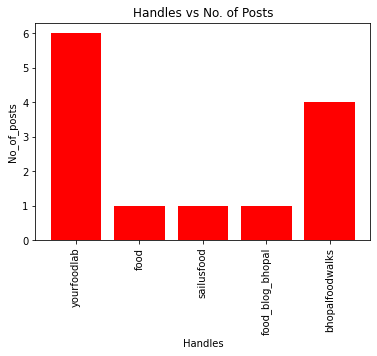

In [7]:
import matplotlib.pyplot as plt
plt.bar(handles,post_count_3_days,color='red')
plt.xticks(rotation=90)
plt.xlabel('Handles')
plt.ylabel('No_of_posts')
plt.title('Handles vs No. of Posts')
plt.show()

## 2.1 Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

In [8]:
dic = {}
# going to each 5 handle
for name in handles:
    time.sleep(2)
    wait = WebDriverWait(driver, 10)
    wait.until(EC.presence_of_element_located((By.XPATH, '//input[@class = "XTCLo  x3qfX "]')))
    search = driver.find_element_by_xpath('//input[@class = "XTCLo  x3qfX "]')
    search.clear()
    search.send_keys(name) ## searching food
    wait = WebDriverWait(driver, 10)
    wait.until(EC.presence_of_element_located((By.XPATH, '//a[@class = "-qQT3"]')))
    result = driver.find_elements_by_xpath('//a[@class = "-qQT3"]')    
    for link in result:
        if '/' + name + '/' in link.get_attribute('href'):
            link.click()
            break
    wait = WebDriverWait(driver, 10)
    wait.until(EC.presence_of_element_located((By.CLASS_NAME, '_9AhH0')))
    next = driver.find_element_by_class_name('_9AhH0')
    #going to each of the 10 post
    for i in range(10):
        next.click()
        wait = WebDriverWait(driver, 10)
        wait.until(EC.presence_of_element_located((By.XPATH, '//div[@class = "C4VMK" ]/span')))
        content = driver.find_element_by_xpath('//div[@class = "C4VMK" ]/span')
        li = content.text.replace('\n',' ').split(' ')
        #storing all the words in dict
        for i in li:
            if i != '.' and i != '':
                if i.strip() in dic:
                    dic[i] += 1
                else:
                    dic[i.strip()] = 1
        next = driver.find_element_by_xpath('//a[@class = " _65Bje  coreSpriteRightPaginationArrow"]')
    driver.back()

## 2.2 Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

## 2.3 Create a csv file with two columns : the word and its frequency

In [9]:
## done both ques together
import numpy as np
import pandas as pd
li_2d=[]
for i in dic:
    small=[]
    small.append(i)
    small.append(dic[i])
    li_2d.append(small)
final_data=np.array(li_2d)
dataset=pd.DataFrame({'Word':final_data[:,0],'Frequency':final_data[:,1]})
dataset.to_csv('Word_Frequency.csv',index=False)
print(dataset)

              Word Frequency
0              Aam         1
1            Panna         1
2               by        13
3             Chef         6
4     @sanjyotkeer         7
...            ...       ...
1550        samosa         1
1551         wala,         1
1552      Amritsar         1
1553          near         1
1554       Temple.         1

[1555 rows x 2 columns]


## 2.4 Now, find the hashtags that were most popular among these bloggers

In [10]:
hastags = {}
for i in dic:
    if '#' in i:
        if i in hastags:
            hastags[i] += 1
        else:
            hastags[i] = 1
new_hashtags=sorted(hastags,key=hastags.get,reverse=True)
print('Top 5 Hashtags')
print()
top_5_hash=[]
top_5_times=[]
for i in range(5):
    top_5_hash.append(new_hashtags[i])
    top_5_times.append(hastags[new_hashtags[i]])
for j in range(5):
    print(top_5_hash[j],'',top_5_times[j])
## coincidencly every hastag was used only once

Top 5 Hashtags

#recipe  1
#foodie  1
#indiancuisine  1
#streetfood  1
#streetfoodindia  1


## 2.5 Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

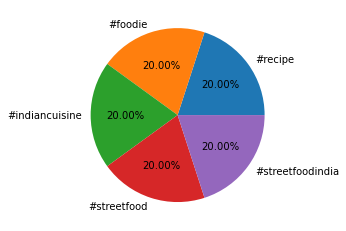

In [11]:

import matplotlib.pyplot as plt
plt.pie(top_5_times,labels=top_5_hash,autopct="%.2f%%")
plt.show()


## 3.1 Find out the likes of the top 10 posts of the 5 handles obtained earlier.

In [12]:
likes_of_all = []
for name in handles:
    time.sleep(2)
    wait = WebDriverWait(driver, 10)
    wait.until(EC.presence_of_element_located((By.XPATH, '//input[@class = "XTCLo  x3qfX "]')))
    search = driver.find_element_by_xpath('//input[@class = "XTCLo  x3qfX "]')
    search.clear()
    search.send_keys(name) ## searching food
    wait = WebDriverWait(driver, 10)
    wait.until(EC.presence_of_element_located((By.XPATH, '//a[@class = "-qQT3"]')))
    result = driver.find_elements_by_xpath('//a[@class = "-qQT3"]')
    # going to each handle    
    for link in result:
        if '/' + name + '/' in link.get_attribute('href'):
            link.click()
            break
    wait = WebDriverWait(driver, 10)
    wait.until(EC.presence_of_element_located((By.CLASS_NAME, '_9AhH0')))
    next = driver.find_element_by_class_name('_9AhH0')
    likes_for_current = []
    i = 0
    #going to each post.
    # there are some post which does not show o. of likes so skipped that 
    while True:
        if( i == 10):
            break
        next.click()
        try:
            wait = WebDriverWait(driver, 5)
            wait.until(EC.presence_of_element_located((By.XPATH, '//a[@class = "zV_Nj"]/span')))
            likes = driver.find_element_by_xpath('//a[@class = "zV_Nj"]/span').text.replace(',','')
            likes_for_current.append(int(likes))
            i+=1
        except:
            pass
        next = driver.find_element_by_xpath('//a[@class = " _65Bje  coreSpriteRightPaginationArrow"]')
    likes_of_all.append(likes_for_current)
    driver.back()
for i in range(5):
    print(handles[i],':-')
    for j in range(0,10):
        print('post',j+1,': ',likes_of_all[i][j]) 

yourfoodlab :-
post 1 :  17743
post 2 :  27294
post 3 :  56152
post 4 :  40753
post 5 :  65807
post 6 :  35821
post 7 :  10626
post 8 :  36067
post 9 :  47153
post 10 :  55477
food :-
post 1 :  163
post 2 :  533
post 3 :  663
post 4 :  1254
post 5 :  939
post 6 :  956
post 7 :  837
post 8 :  1108
post 9 :  1130
post 10 :  967
sailusfood :-
post 1 :  4364
post 2 :  3482
post 3 :  3221
post 4 :  5249
post 5 :  4240
post 6 :  2939
post 7 :  2430
post 8 :  3064
post 9 :  2165
post 10 :  2180
food_blog_bhopal :-
post 1 :  157
post 2 :  344
post 3 :  246
post 4 :  86
post 5 :  206
post 6 :  162
post 7 :  193
post 8 :  238
post 9 :  253
post 10 :  502
bhopalfoodwalks :-
post 1 :  140
post 2 :  1069
post 3 :  914
post 4 :  693
post 5 :  503
post 6 :  229
post 7 :  964
post 8 :  724
post 9 :  675
post 10 :  273


## 3.2 Calculate the average likes for a handle.

In [13]:
import numpy as np
likes_of_all = np.array(likes_of_all)
average_likes_handle = []
for i in range(5):
    average_likes_handle.append(likes_of_all[i].mean())
    print(handles[i],': ',likes_of_all[i].mean() )

yourfoodlab :  39289.3
food :  855.0
sailusfood :  3333.4
food_blog_bhopal :  238.7
bhopalfoodwalks :  618.4


## 3.3 Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

In [14]:
like_ratio = []
for i in range(5):
    print(handles[i],average_likes_handle[i]/followers[i])
    like_ratio.append(average_likes_handle[i]/followers[i])

yourfoodlab 0.024555812500000003
food 0.007125
sailusfood 0.04782496413199426
food_blog_bhopal 0.011875621890547264
bhopalfoodwalks 0.054245614035087715


## 3.4 Create a bar graph to depict the above obtained information.

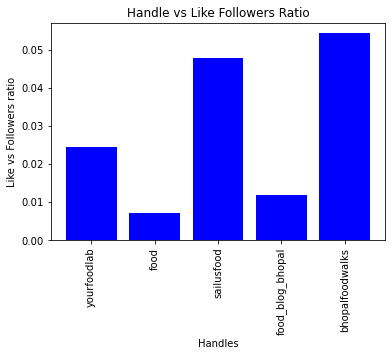

In [15]:
import matplotlib.pyplot as plt
plt.bar(handles,like_ratio,color='blue')
plt.xticks(rotation=90)
plt.xlabel('Handles')
plt.ylabel('Like vs Followers ratio')
plt.title('Handle vs Like Followers Ratio')
plt.show()